In [250]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import preprocessing

pd.options.display.max_rows = None
pd.options.display.max_columns = None

## Question 1

In [128]:
# use sep or delimiter
dataset = pd.read_csv('Data_Car_1000.txt', sep = '\t')

df = pd.DataFrame(dataset)
df

Make               Model MakeCode FamilyCode  YearGroup  \
0             Ford              Ranger     FORD     RANGER       2014   
1           Toyota              Kluger     TOYO     KLUGER       2015   
2           Subaru             Liberty     SUBA    LIBERTY       2012   
3             Jeep             Compass     JEEP    COMPASS       2014   
4       Mitsubishi              Triton     MITS     TRITON       2011   
5           Holden               Cruze     HOLD      CRUZE       2012   
6           Toyota               Hiace     TOYO      HIACE       2009   
7            smart          city-coupe     SMAR    CITY-CO       2003   
8           Toyota               Camry     TOYO      CAMRY       2016   
9             Ford              Ranger     FORD     RANGER       2012   
10          Toyota         Landcruiser     TOYO    LANDCRU       2009   
11          Toyota               Camry     TOYO      CAMRY       2015   
12            Audi                  Q3     AUDI         Q3       2012   
13          Toyota               Hilux     TOYO      HILUX       2005   
14          Holden           Commodore     HOLD    COMMODO       2015   
15          Nissan             X-Trail     NISS    X-TRAIL       2013   
16          Toyota            Fortuner     TOYO    FORTUNE       2015   
17          Holden            Colorado     HOLD    COLORAD       2014   
18          Toyota               Camry     TOYO      CAMRY       2013   
19            Ford              Ranger     FORD     RANGER       2012   
20         Renault              Master     RENA     MASTER       2014   
21        Chrysler                 300     CHRY        300       2014   
22            Ford              Ranger     FORD     RANGER       2012   
23          Toyota               Camry     TOYO      CAMRY       2012   
24          Toyota               Hilux     TOYO      HILUX       2006   
25          Toyota               Hilux     TOYO      HILUX       2013   
26            Ford                Kuga     FORD       KUGA       2014   
27          Toyota               Camry     TOYO      CAMRY       2016   
28          Holden                 Ute     HOLD        UTE       2015   
29          Holden                 Ute     HOLD        UTE       2007   
30          Toyota               Camry     TOYO      CAMRY       2016   
31          Holden                 Ute     HOLD        UTE       2011   
32         Hyundai                iMax     HYUN       IMAX       2013   
33          Toyota                RAV4     TOYO       RAV4       2015   
34          Toyota             Corolla     TOYO    COROLLA       2015   
35          Toyota             Corolla     TOYO    COROLLA       2014   
36          Toyota             Corolla     TOYO    COROLLA       2013   
37          Toyota               Camry     TOYO      CAMRY       2014   
38          Toyota             Corolla     TOYO    COROLLA       2011   
39          Nissan              Patrol     NISS     PATROL       2015   
40          Holden            Colorado     HOLD    COLORAD       2011   
41          Toyota                RAV4     TOYO       RAV4       2001   
42          Toyota             Corolla     TOYO    COROLLA       2013   
43          Toyota              Kluger     TOYO     KLUGER       2014   
44          Subaru            Forester     SUBA    FORESTE       2014   
45            Ford              Ranger     FORD     RANGER       2012   
46          Holden           Commodore     HOLD    COMMODO       2015   
47          Holden               Cruze     HOLD      CRUZE       2012   
48          Holden              Malibu     HOLD     MALIBU       2013   
49          Nissan              Navara     NISS     NAVARA       2008   
50           Mazda                   6     MAZD          6       2016   
51          Toyota               Hilux     TOYO      HILUX       2014   
52          Holden           Commodore     HOLD    COMMODO       2013   
53          Toyota               Hilux     TOYO      HILUX       2012   

In [129]:
df.shape

(999, 130)

In [222]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 130 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    Make                            object 
 1    Model                           object 
 2    MakeCode                        object 
 3    FamilyCode                      object 
 4    YearGroup                       int64  
 5    MonthGroup                      int64  
 6    SequenceNum                     int64  
 7    Description                     object 
 8    CurrentRelease                  object 
 9    ImportFlag                      object 
 10   LimitedEdition                  object 
 11   Series                          object 
 12   SeriesModelYear                 object 
 13   BadgeDescription                object 
 14   BadgeSecondaryDescription       object 
 15   BodyStyleDescription            object 
 16   BodyConfigDescription           object 
 17   WheelBaseConfi

In [131]:
df.isnull().sum()

Make                                0
Model                               0
MakeCode                            0
FamilyCode                          0
YearGroup                           0
MonthGroup                          0
SequenceNum                         0
Description                         0
CurrentRelease                      0
ImportFlag                          0
LimitedEdition                      0
Series                             10
SeriesModelYear                   502
BadgeDescription                   78
BadgeSecondaryDescription         878
BodyStyleDescription                0
BodyConfigDescription             783
WheelBaseConfig                   966
Roofline                          981
ExtraIdentification               911
DriveDescription                    0
DriveCode                           0
GearTypeDescription                 0
GearLocationDescription             0
GearNum                             0
DoorNum                             0
EngineSize  

In [225]:
nulls = df.isnull().sum()
new_df = df[nulls[nulls < 100].index]

In [226]:
unique = new_df.nunique()
unique

Make                               26
Model                             145
MakeCode                           26
FamilyCode                        145
YearGroup                          20
MonthGroup                         13
SequenceNum                        54
Description                       663
CurrentRelease                      2
ImportFlag                          1
LimitedEdition                      2
Series                            237
BadgeDescription                  178
BodyStyleDescription               12
DriveDescription                    7
DriveCode                           7
GearTypeDescription                 7
GearLocationDescription             7
GearNum                             7
DoorNum                             4
EngineSize                        112
EngineDescription                  33
Cylinders                           5
FuelTypeDescription                 5
InductionDescription                6
OptionCategory                      5
CamDescripti

In [227]:
new_df = new_df[unique[unique > 1].index]

In [228]:
new_df.shape

(999, 78)

In [229]:
nulls = new_df.isnull().sum()
nulls[nulls > 0].index

len(new_df[nulls[nulls > 0].index].median())

C:\Users\ACER\AppData\Local\Temp\ipykernel_17040\2412236823.py:4: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  len(new_df[nulls[nulls > 0].index].median())


22

In [230]:
len(nulls[nulls > 0].index)

29

In [231]:
for i in nulls[nulls > 0].index:
    if new_df[i].dtype != 'O':
        new_df[i].fillna(new_df[i].median(), inplace=True)

In [233]:
new_df.dropna(inplace=True)

In [235]:
new_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 0 to 998
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Make                            892 non-null    object 
 1   Model                           892 non-null    object 
 2   MakeCode                        892 non-null    object 
 3   FamilyCode                      892 non-null    object 
 4   YearGroup                       892 non-null    int64  
 5   MonthGroup                      892 non-null    int64  
 6   SequenceNum                     892 non-null    int64  
 7   Description                     892 non-null    object 
 8   CurrentRelease                  892 non-null    object 
 9   LimitedEdition                  892 non-null    object 
 10  Series                          892 non-null    object 
 11  BadgeDescription                892 non-null    object 
 12  BodyStyleDescription            892 

In [248]:
label_encoder = preprocessing.LabelEncoder()

for i in new_df.columns:
    if new_df[i].dtype == 'O':
        new_df[i] = label_encoder.fit_transform(new_df[i])

In [251]:
new_df

Make  Model  MakeCode  FamilyCode  YearGroup  MonthGroup  SequenceNum  \
0       3    100         3         105       2014           0            4   
1      21     66        22          72       2015          11           11   
3       7     37         7          33       2014           0            4   
4      12    114        12         120       2011           0            7   
5       4     40         4          36       2012           7           35   
6      21     58        22          59       2009           0            9   
7      24    120        19          26       2003           6            0   
8      21     26        22          20       2016           5            7   
9       3    100         3         105       2012           0           24   
10     21     70        22          76       2009           0            4   
11     21     26        22          20       2015           4            6   
12      0     95         0         101       2012           8            7   
13     21     59        22          60       2005           3           45   
14      4     36         4          32       2015           0            0   
15     13    116        13         122       2013           0            1   
16     21     53        22          54       2015           8            5   
17      4     33         4          30       2014           0           22   
18     21     26        22          20       2013           0            0   
19      3    100         3         105       2012           0            9   
21      1      2         1           2       2014           0            2   
22      3    100         3         105       2012           0           20   
23     21     26        22          20       2012           0            5   
24     21     59        22          60       2006           0            9   
25     21     59        22          60       2013           0           31   
26      3     68         3          74       2014           0            3   
27     21     26        22          20       2016           0            2   
30     21     26        22          20       2016           0            2   
33     21     97        22         106       2015           0           10   
34     21     38        22          34       2015           0            9   
35     21     38        22          34       2014           0           11   
36     21     38        22          34       2013           0            1   
37     21     26        22          20       2014           0            0   
38     21     38        22          34       2011           0            1   
39     13     89        13          93       2015           0            1   
40      4     33         4          30       2011           0           16   
41     21     97        22         106       2001           0            1   
42     21     38        22          34       2013           0            9   
43     21     66        22          72       2014           3            3   
44     19     52        20          53       2014           2            1   
45      3    100         3         105       2012           0           10   
46      4     36         4          32       2015           0           16   
47      4     40         4          36       2012           7           33   
48      4     76         4          78       2013           6            1   
49     13     81        13          86       2008           0           15   
50     10      4        10           4       2016           7           19   
51     21     59        22          60       2014           0           15   
52      4     36         4          32       2013           5           41   
53     21     59        22          60       2012           0            8   
54      6    125         6          68       2014           0           10   
55      8     41         8          42       2012           0            2   
56     21    106        22 

In [252]:
new_df.corr()

Make     Model  MakeCode  FamilyCode  \
Make                            1.000000 -0.118628  0.999417   -0.064925   
Model                          -0.118628  1.000000 -0.122510    0.932128   
MakeCode                        0.999417 -0.122510  1.000000   -0.066884   
FamilyCode                     -0.064925  0.932128 -0.066884    1.000000   
YearGroup                       0.159817 -0.149445  0.164276   -0.153100   
MonthGroup                     -0.031012 -0.064167 -0.030978   -0.071192   
SequenceNum                    -0.160803 -0.017541 -0.158034   -0.024348   
Description                    -0.119340  0.041806 -0.118129    0.063156   
CurrentRelease                  0.057051 -0.095551  0.057672   -0.095342   
LimitedEdition                 -0.131242 -0.077836 -0.131060   -0.076091   
Series                         -0.135654  0.063342 -0.134519    0.087176   
BadgeDescription               -0.395029  0.201492 -0.396315    0.262269   
BodyStyleDescription           -0.141627  0.093468 -0.142108    0.112856   
DriveDescription               -0.143063 -0.182225 -0.140504   -0.237537   
DriveCode                      -0.182879 -0.149453 -0.182555   -0.200365   
GearTypeDescription            -0.289512 -0.095448 -0.287004   -0.094871   
GearLocationDescription         0.082459 -0.159904  0.083573   -0.157111   
GearNum                        -0.105304 -0.154201 -0.101993   -0.161652   
DoorNum                        -0.073978  0.126670 -0.074525    0.108798   
EngineSize                     -0.129053 -0.052570 -0.123514    0.015411   
EngineDescription              -0.125238 -0.052103 -0.119714    0.015483   
Cylinders                      -0.160272 -0.035299 -0.155251    0.008085   
FuelTypeDescription             0.168233 -0.272528  0.169302   -0.321049   
InductionDescription           -0.095170  0.253223 -0.098161    0.301595   
OptionCategory                  0.035098  0.055472  0.031961    0.071390   
CamDescription                 -0.193330  0.186746 -0.198294    0.222983   
EngineTypeDescription           0.096529 -0.098551  0.097597   -0.109252   
FuelCapacity                    0.009744  0.074982  0.011290    0.168442   
FuelDeliveryDescription         0.226547 -0.132839  0.227241   -0.165368   
MethodOfDeliveryDescription    -0.036245 -0.121870 -0.034352   -0.144619   
VIN                             0.054399  0.242780  0.049825    0.230080   
WheelBase                      -0.228009  0.090641 -0.222567    0.151414   
Height                          0.012301  0.360099  0.010474    0.445574   
Length                         -0.189194 -0.006869 -0.182179    0.077526   
Width                          -0.321189 -0.001128 -0.316422    0.057126   
KerbWeight                     -0.184013  0.191883 -0.181206    0.281700   
Power                          -0.196439 -0.152524 -0.191648   -0.110103   
PowerRPMTo                      0.103423 -0.304996  0.104267   -0.362676   
Torque                         -0.274403  0.144911 -0.271927    0.221665   
TorqueRPMTo                     0.382209 -0.172299  0.385750   -0.209784   
SeatCapacity                    0.080757 -0.002160  0.082783    0.021077   
BuildCountryOriginDescription  -0.043246  0.299702 -0.046672    0.290816   
ValvesCylinder                  0.071036 -0.014891  0.077836   -0.001815   
EngineConfigurationDescription -0.111320 -0.097625 -0.109291   -0.070872   
EngineLocation                  0.044992  0.059375  0.020481   -0.032595   
EngineNum                      -0.553062  0.054947 -0.559306    0.021341   
FrontTyreSize                  -0.296101  0.163776 -0.295333    0.251841   
RearTyreSize                   -0.293282  0.164975 -0.292612    0.253125   
FrontRimDesc                   -0.167789 -0.018822 -0.169108    0.044527   
RearRimDesc                    -0.168092 -0.018533 -0.169683    0.044038   
TowingBrakes                   -0.257856  0.238385 -0.258240    0.310582   
TowingNoBrakes                 -0.402715  0.289869 -0.405934    0.380781   
Warranty

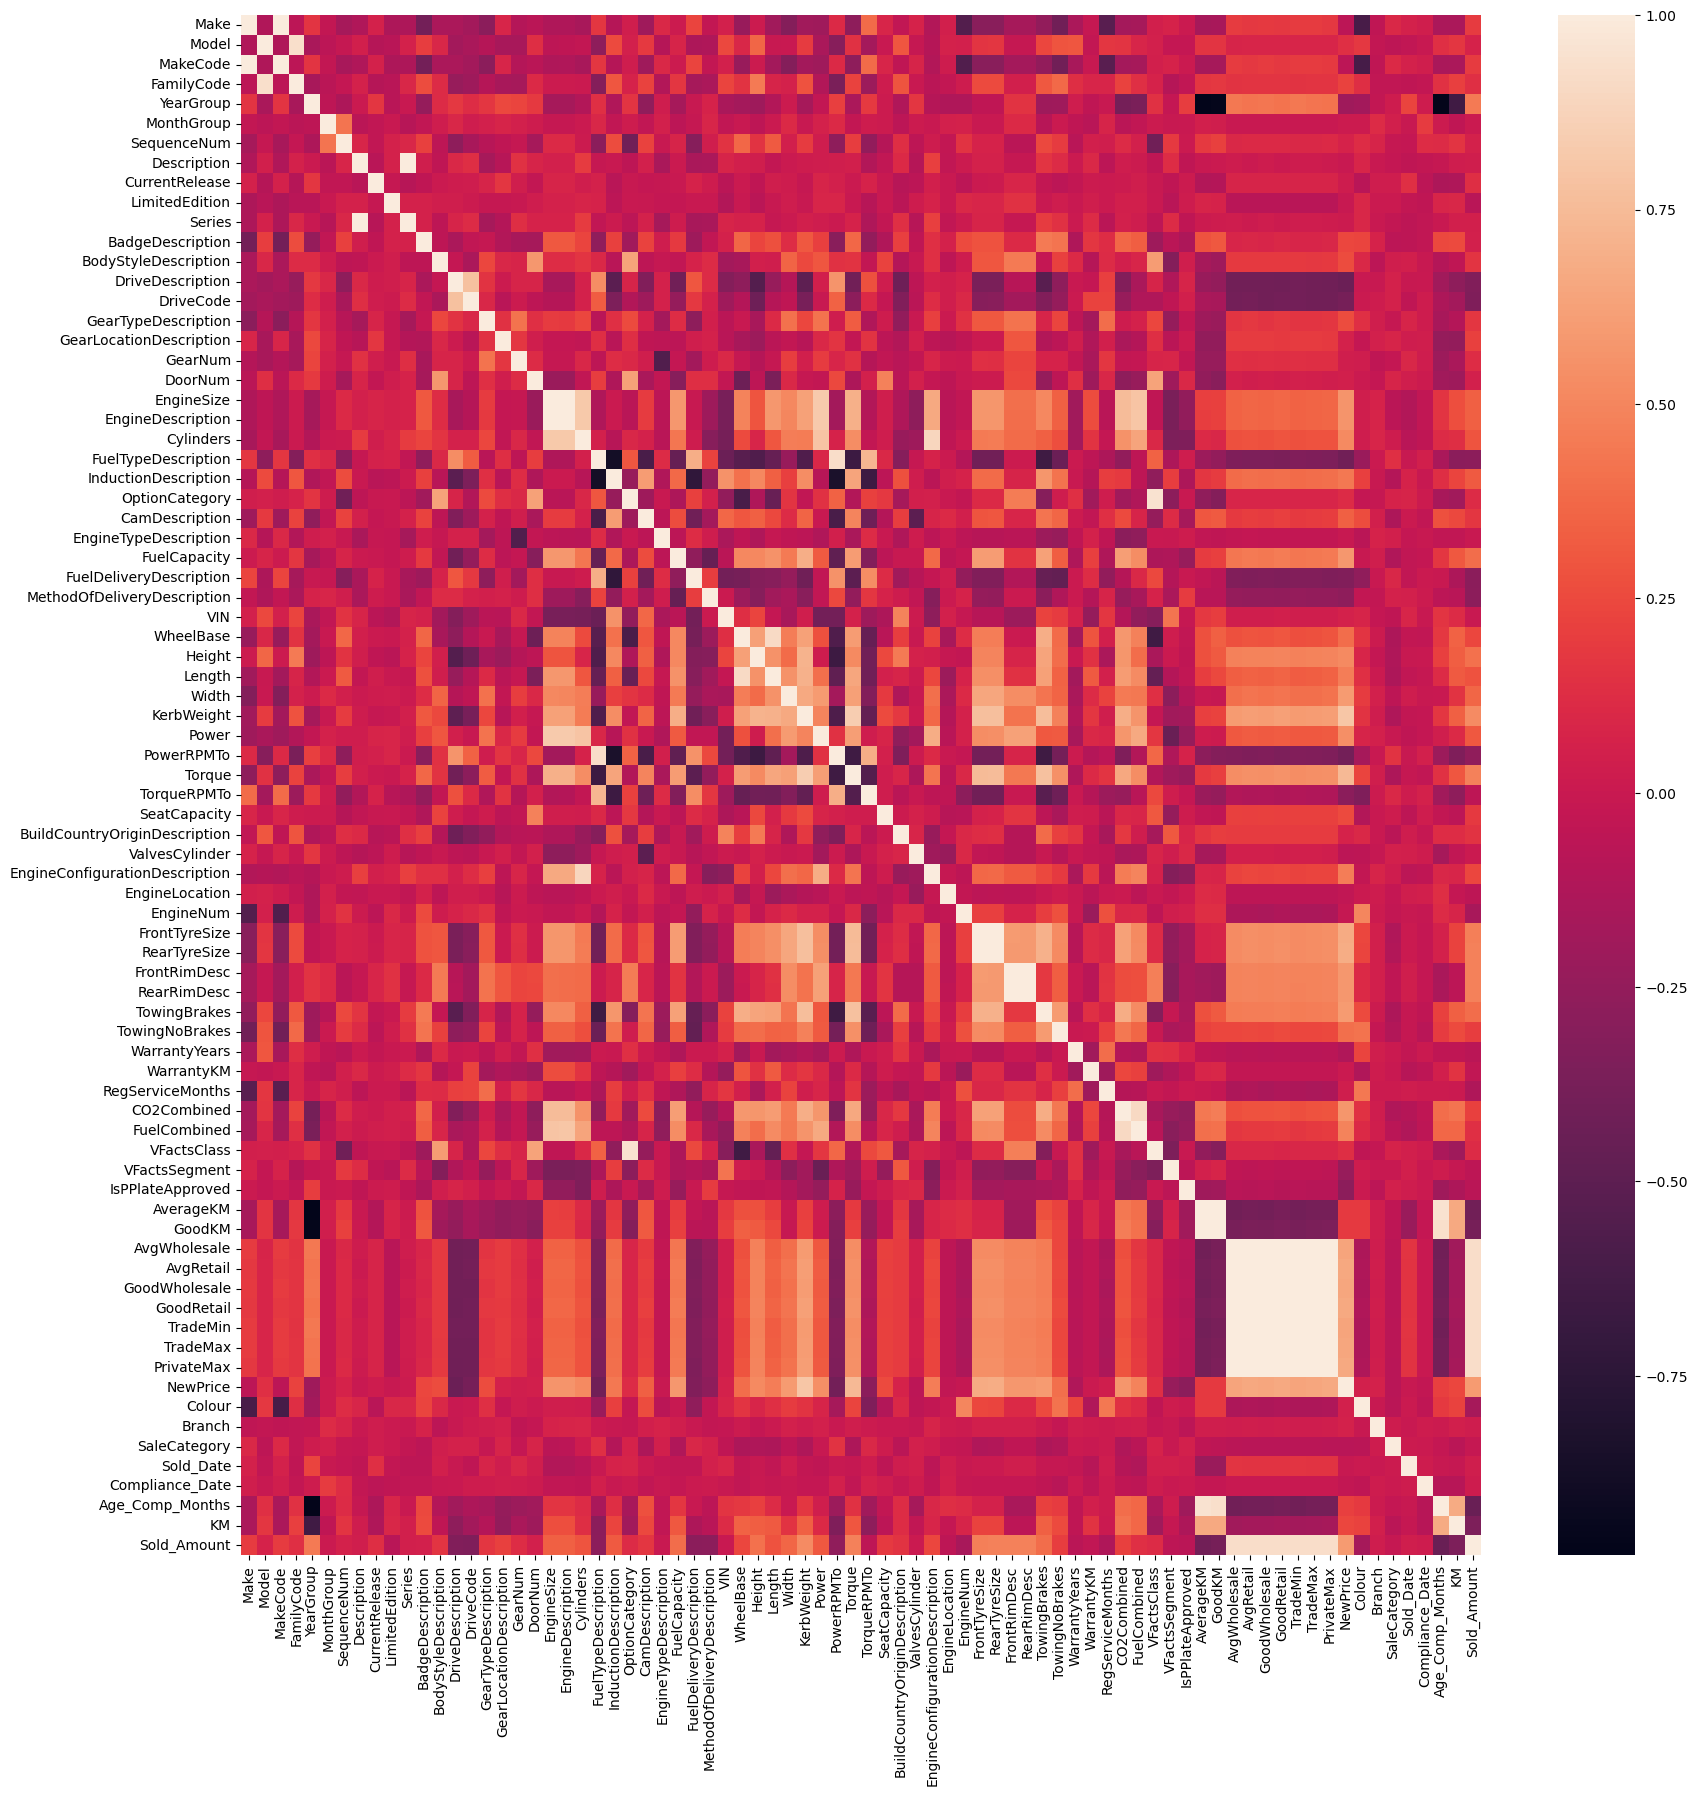

In [255]:
plt.figure(figsize=(20, 20))
sn.heatmap(new_df.corr())
plt.show()

In [ ]:
new_df['Model'] = label_encoder.inverse_transform(new_df['Model'])

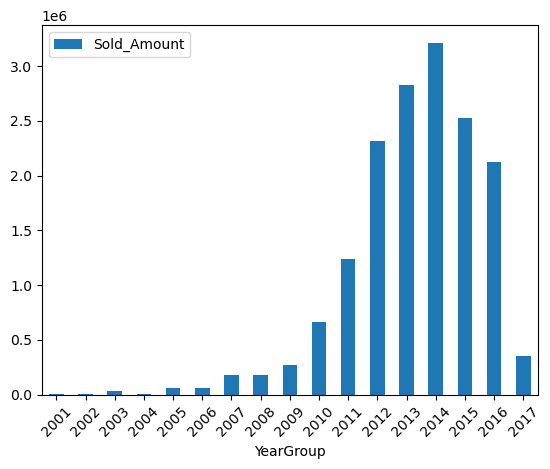

In [373]:
grouped_df = new_df.groupby(['YearGroup'])[['Sold_Amount']].sum()
grouped_df.plot(kind = 'bar', rot = 45)
plt.show()

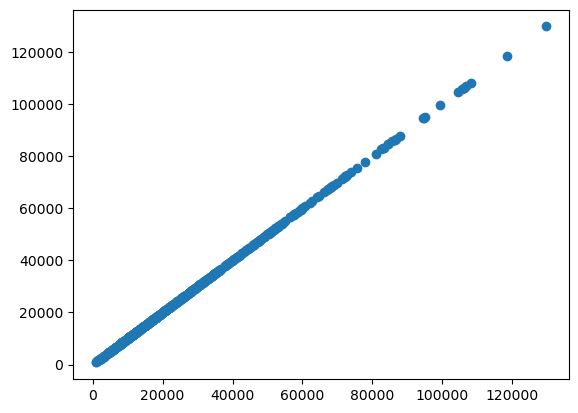

In [395]:
# plt.figure(figsize=(20,10))
# plt.hist(new_df)
# plt.show()

grouped_df = new_df.groupby(['AvgWholesale', 'AvgRetail', 'GoodWholesale', 'AvgWholesale'])[['Sold_Amount']].sum()
plt.scatter(grouped_df, grouped_df['Sold_Amount'])
plt.show()

## Question 2

## Question 3

In [2]:
text = open('text_q3.txt', encoding='utf-8').read()
text = text.replace('\n', '')
text

"As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics. In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus. The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category. Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance. Depending on the particular application, the data that's analyzed can consist of

In [3]:
sentences = sent_tokenize(text)
print(sentences)

['As a term, data analytics predominantly refers to an assortment of applications, from basic business intelligence (BI), reporting and online analytical processing (OLAP) to various forms of advanced analytics.', "In that sense, it's similar in nature to business analytics, another umbrella term for approaches to analyzing data -- with the difference that the latter is oriented to business uses, while data analytics has a broader focus.", "The expansive view of the term isn't universal, though: In some cases, people use data analytics specifically to mean advanced analytics, treating BI as a separate category.", 'Data analytics initiatives can help businesses increase revenues, improve operational efficiency, optimize marketing campaigns and customer service efforts, respond more quickly to emerging market trends and gain a competitive edge over rivals -- all with the ultimate goal of boosting business performance.', "Depending on the particular application, the data that's analyzed c

In [4]:
words = word_tokenize(text)
print(words)

['As', 'a', 'term', ',', 'data', 'analytics', 'predominantly', 'refers', 'to', 'an', 'assortment', 'of', 'applications', ',', 'from', 'basic', 'business', 'intelligence', '(', 'BI', ')', ',', 'reporting', 'and', 'online', 'analytical', 'processing', '(', 'OLAP', ')', 'to', 'various', 'forms', 'of', 'advanced', 'analytics', '.', 'In', 'that', 'sense', ',', 'it', "'s", 'similar', 'in', 'nature', 'to', 'business', 'analytics', ',', 'another', 'umbrella', 'term', 'for', 'approaches', 'to', 'analyzing', 'data', '--', 'with', 'the', 'difference', 'that', 'the', 'latter', 'is', 'oriented', 'to', 'business', 'uses', ',', 'while', 'data', 'analytics', 'has', 'a', 'broader', 'focus', '.', 'The', 'expansive', 'view', 'of', 'the', 'term', 'is', "n't", 'universal', ',', 'though', ':', 'In', 'some', 'cases', ',', 'people', 'use', 'data', 'analytics', 'specifically', 'to', 'mean', 'advanced', 'analytics', ',', 'treating', 'BI', 'as', 'a', 'separate', 'category', '.', 'Data', 'analytics', 'initiatives

In [5]:
fdist = FreqDist(words)

In [19]:
filtered_words = nltk.wordpunct_tokenize(text)
words_no_punc = []
stop_words = set(stopwords.words('english'))
print('Stopwords:', stop_words)
print()

for word in filtered_words:
    if word not in stop_words and word.isalpha():
        words_no_punc.append(word.lower())
        
freq_words = FreqDist(words_no_punc)
print('Frequent words:', freq_words.most_common())
print()

Stopwords: {'you', 'isn', 'wouldn', 'during', 'ourselves', "weren't", 'here', "you'll", 'his', 'her', "you're", 'until', 'by', 'up', "it's", 'but', 'and', 'under', "mustn't", "didn't", 'against', 'should', 'ma', 'no', 'own', 'from', 'have', 's', 'how', 'd', "hadn't", 'doing', 'shouldn', 'be', 'haven', 'or', 'nor', 'will', 'yourselves', "needn't", 'am', 'of', 'more', 'once', 'which', 'were', 'our', 'she', "wasn't", 'been', 'does', 'i', 'hers', 'needn', 'themselves', 'their', 'further', 'are', 'a', 'weren', 'couldn', 'for', 'before', 'did', "she's", 'shan', 'is', "that'll", "shouldn't", 'such', 'only', 'then', "aren't", "hasn't", 't', 'to', 'having', 'too', 'on', 'don', 'over', 'who', 'off', 'if', 'those', 'yours', 'both', 'all', 'very', 'not', 'while', 'hadn', "mightn't", 'because', 'aren', 'yourself', 'm', 'so', 'its', 'him', 'hasn', 'below', 'ain', 'the', 'has', 'himself', 'was', 'it', 'when', 'each', 'in', 'wasn', 'he', 'with', 'll', 'didn', "shan't", "wouldn't", 'them', "you've", 't

In [7]:
# 3a

count = 0
for index, sentence in enumerate(sentences):
    if 'data' in sentence:
        count += 1
        
count/len(sentences) * 100

81.81818181818183

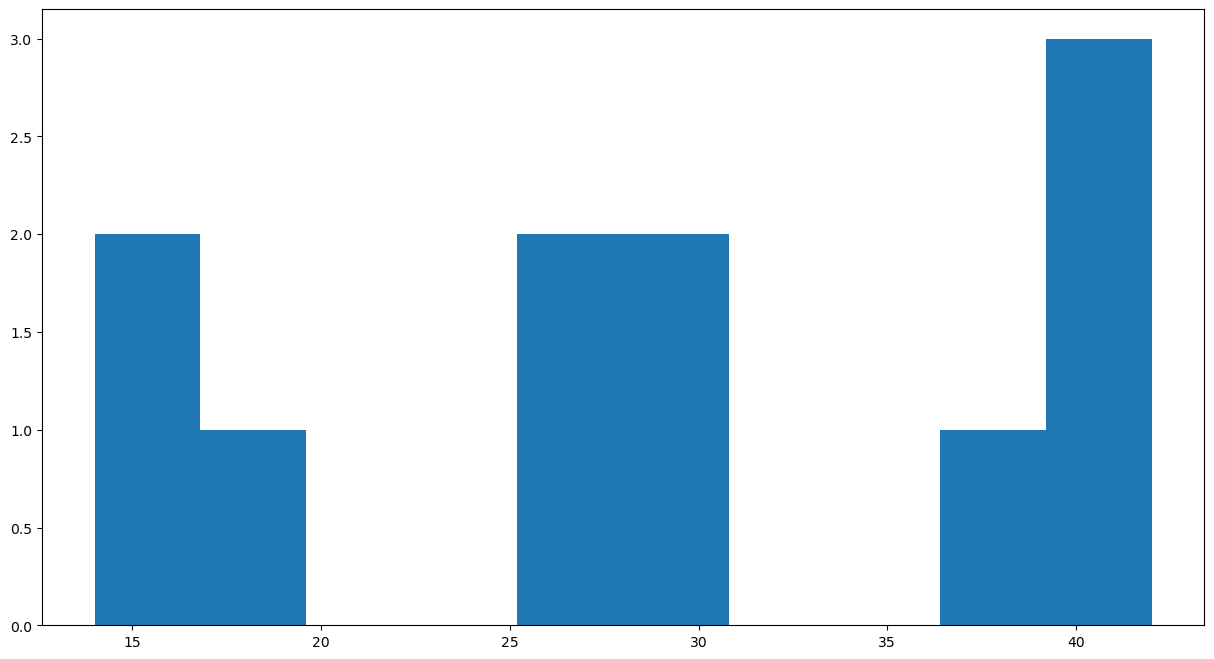

In [34]:
# 3b

sentence_count = []
for index, sentence in enumerate(sentences):
    word_list = []
    for word in sentence.split():
        word_list.append(word)
    sentence_count.append(len(word_list))

plt.figure(figsize = (15,8))
plt.hist(sentence_count)
plt.show()

In [121]:
# 3c

paired = []
for sentence in sentences:
    word_list = sentence.split()
    for index, word in enumerate(word_list):
        if (word_list[index] == 'data' or word_list[index] == 'Data') and (word_list[index + 1] == 'analytics' or word_list[index + 1] == 'Analytics'):
            paired.append(f'{word_list[index]} {word_list[index + 1]}')
        
len(paired) / freq_words['data']

0.3333333333333333